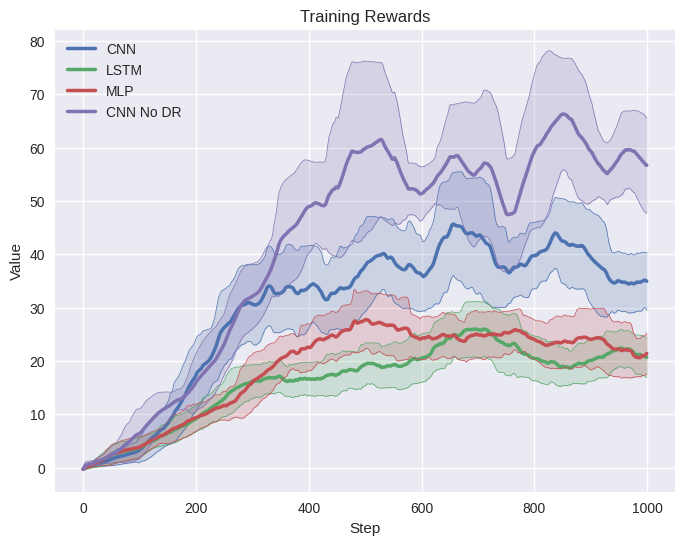

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn-v0_8')

def custom_rolling_mean_std(data, max_window_size):
    rolling_means = []
    rolling_stds = []
    
    for i in range(1, len(data) + 1):
        window_size = min(i, max_window_size)
        window_data = data[i-window_size:i]
        rolling_means.append(window_data.mean())
        rolling_stds.append(window_data.std())
    
    return np.array(rolling_means), np.array(rolling_stds)

# List of CSV file paths
data_files = [
    'training_data/rewards/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/rewards/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/rewards/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/rewards/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv',
]
# List of labels for the legend
labels = ['CNN', 'LSTM', 'MLP', 'CNN No DR']

# Define the maximum window size
max_window_size = 100

# Initialize lists to hold DataFrames, rolling means, and standard deviations
dfs = []
rolling_means_list = []
rolling_stds_list = []

# Load and process each CSV file
for data_file in data_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
    
    # Ensure Step column is sorted
    df = df.sort_values(by='Step')
    
    # Filter the DataFrame to start from Step 0
    df = df[df['Step'] >= 0]
    
    # Calculate the custom rolling mean and standard deviation
    rolling_mean, rolling_std = custom_rolling_mean_std(df['Value'], max_window_size)
    
    # Append the processed DataFrame and rolling stats to the lists
    dfs.append(df)
    rolling_means_list.append(rolling_mean)
    rolling_stds_list.append(rolling_std)

# Plotting the rolling mean and standard deviation with matching edges
plt.figure(figsize=(8, 6))

for data_file, labels, df, rolling_mean, rolling_std in zip(data_files, labels, dfs, rolling_means_list, rolling_stds_list):
    steps = df['Step'].values
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    
    plt.plot(steps, rolling_mean, label=labels, color=color, linewidth=2.5)
    plt.fill_between(steps, rolling_mean - rolling_std, rolling_mean + rolling_std, color=color, alpha=0.2)
    plt.plot(steps, rolling_mean - rolling_std, color=color, linewidth=0.5)
    plt.plot(steps, rolling_mean + rolling_std, color=color, linewidth=0.5)

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Training Rewards')
plt.legend()
plt.show()


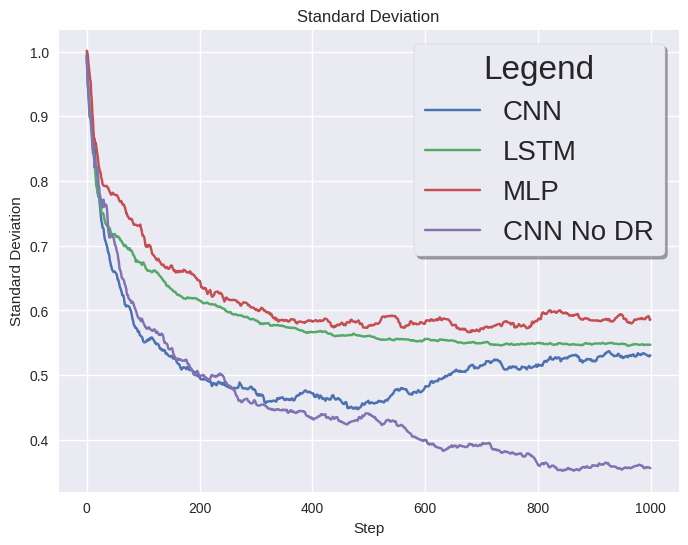

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def custom_rolling_mean_std(data, max_window_size):
    rolling_means = []
    rolling_stds = []
    
    for i in range(1, len(data) + 1):
        window_size = min(i, max_window_size)
        window_data = data[i-window_size:i]
        rolling_means.append(window_data.mean())
        rolling_stds.append(window_data.std())
    
    return np.array(rolling_means), np.array(rolling_stds)

# List of CSV file paths
std_data_files = [
    'training_data/std/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/std/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/std/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/std/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv',
]

# List of labels for the legend
labels = ['CNN', 'LSTM', 'MLP', 'CNN No DR']

# Plotting the rolling mean and standard deviation with matching edges
plt.figure(figsize=(8, 6))

for data_file, label in zip(std_data_files, labels):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
    
    # Ensure Step column is sorted
    df = df.sort_values(by='Step')
    
    steps = df['Step'].values
    values = df['Value'].values
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    
    plt.plot(steps, values, label=label, color=color)

plt.xlabel('Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation')

# Customize the legend
plt.legend(loc='upper right', fontsize='small', title='Legend', title_fontsize='medium', frameon=True, shadow=True)

plt.show()


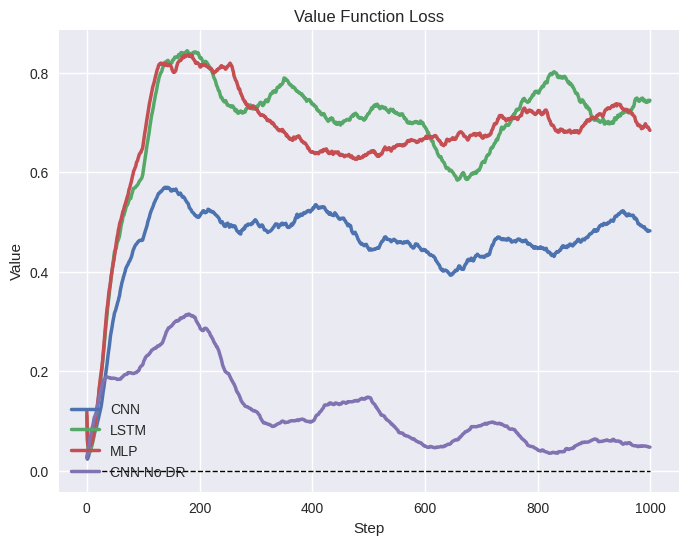

In [6]:
def custom_rolling_mean_std(data, max_window_size):
    rolling_means = []
    rolling_stds = []
    
    for i in range(1, len(data) + 1):
        window_size = min(i, max_window_size)
        window_data = data[i-window_size:i]
        rolling_means.append(window_data.mean())
        rolling_stds.append(window_data.std())
    
    return np.array(rolling_means), np.array(rolling_stds)

# List of CSV file paths
data_files = [
    'training_data/value_function/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/value_function/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/value_function/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/value_function/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv',
]
# List of labels for the legend
labels = ['CNN', 'LSTM', 'MLP', 'CNN No DR']

# Define the maximum window size
max_window_size = 100

# Plotting the rolling mean and standard deviation with matching edges
plt.figure(figsize=(8, 6))

# Initialize lists to hold DataFrames, rolling means, and standard deviations
dfs = []
rolling_means_list = []
rolling_stds_list = []

# Load and process each CSV file
for data_file in data_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
    
    # Ensure Step column is sorted
    df = df.sort_values(by='Step')
    
    # Filter the DataFrame to start from Step 0
    df = df[df['Step'] >= 0]
    
    # Calculate the custom rolling mean and standard deviation
    rolling_mean, rolling_std = custom_rolling_mean_std(df['Value'], max_window_size)
    
    # Append the processed DataFrame and rolling stats to the lists
    dfs.append(df)
    rolling_means_list.append(rolling_mean)
    rolling_stds_list.append(rolling_std)


for data_file, labels, df, rolling_mean, rolling_std in zip(data_files, labels, dfs, rolling_means_list, rolling_stds_list):
    steps = df['Step'].values
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    
    plt.plot(steps, rolling_mean, label=labels, color=color, linewidth=2.5)
    # plt.fill_between(steps, rolling_mean - rolling_std, rolling_mean + rolling_std, color=color, alpha=0.2)
    # plt.plot(steps, rolling_mean - rolling_std, color=color, linewidth=0.5)
    # plt.plot(steps, rolling_mean + rolling_std, color=color, linewidth=0.5)

plt.plot([0, len(steps)], [0, 0], color='black', linestyle='--', linewidth=1)
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Value Function Loss')
plt.legend()
plt.show()


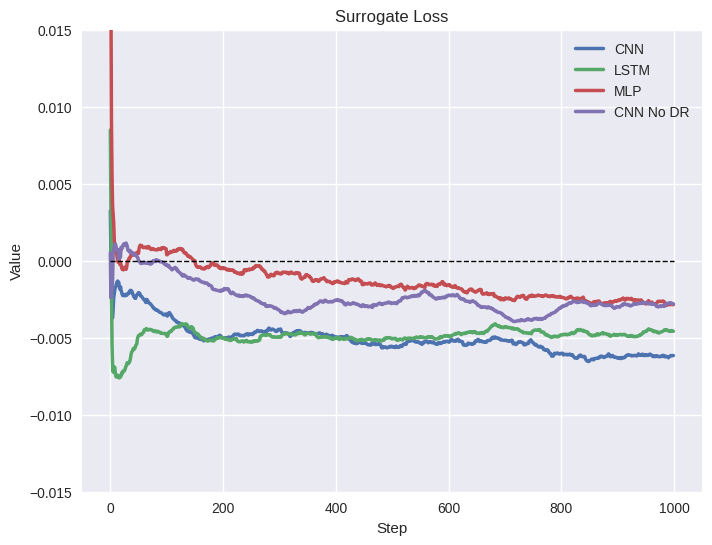

In [7]:
def custom_rolling_mean_std(data, max_window_size):
    rolling_means = []
    rolling_stds = []
    
    for i in range(1, len(data) + 1):
        window_size = min(i, max_window_size)
        window_data = data[i-window_size:i]
        rolling_means.append(window_data.mean())
        rolling_stds.append(window_data.std())
    
    return np.array(rolling_means), np.array(rolling_stds)

# List of CSV file paths
data_files = [
    'training_data/surrogate/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/surrogate/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/surrogate/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/surrogate/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv',
]
# List of labels for the legend
labels = ['CNN', 'LSTM', 'MLP', 'CNN No DR']

# Define the maximum window size
max_window_size = 100

# Plotting the rolling mean and standard deviation with matching edges
plt.figure(figsize=(8, 6))

# Initialize lists to hold DataFrames, rolling means, and standard deviations
dfs = []
rolling_means_list = []
rolling_stds_list = []

# Load and process each CSV file
for data_file in data_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
    
    # Ensure Step column is sorted
    df = df.sort_values(by='Step')
    
    # Filter the DataFrame to start from Step 0
    df = df[df['Step'] >= 0]
    
    # Calculate the custom rolling mean and standard deviation
    rolling_mean, rolling_std = custom_rolling_mean_std(df['Value'], max_window_size)
    
    # Append the processed DataFrame and rolling stats to the lists
    dfs.append(df)
    rolling_means_list.append(rolling_mean)
    rolling_stds_list.append(rolling_std)

for data_file, labels, df, rolling_mean, rolling_std in zip(data_files, labels, dfs, rolling_means_list, rolling_stds_list):
    steps = df['Step'].values
    color = next(plt.gca()._get_lines.prop_cycler)['color']
    
    plt.plot(steps, rolling_mean, label=labels, color=color, linewidth=2.5)
    # plt.fill_between(steps, rolling_mean - rolling_std, rolling_mean + rolling_std, color=color, alpha=0.2)
    # plt.plot(steps, rolling_mean - rolling_std, color=color, linewidth=0.5)
    # plt.plot(steps, rolling_mean + rolling_std, color=color, linewidth=0.5)
plt.plot([0, len(steps)], [0, 0], color='black', linestyle='--', linewidth=1)
plt.ylim(-0.015, 0.015)
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Surrogate Loss')
plt.legend()
plt.show()


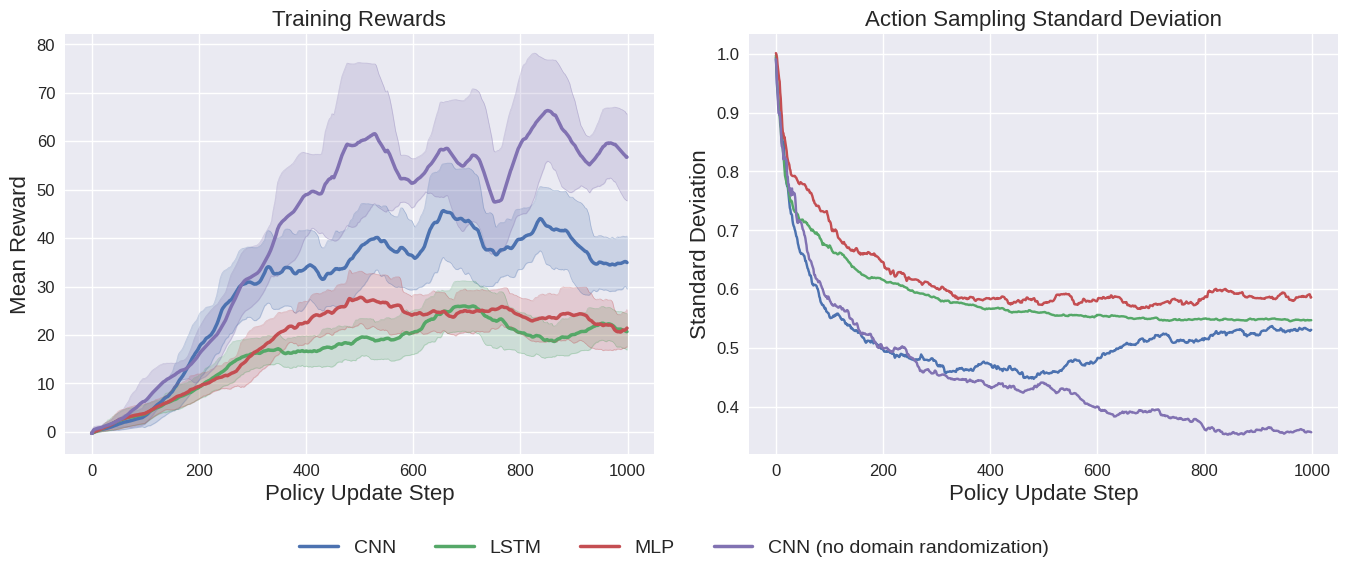

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

plt.style.use('seaborn-v0_8')

plt.rcParams.update({
    'font.size': 24,
    'axes.titlesize': 16,     # Font size for titles
    'axes.labelsize': 16,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 12     # Font size for legend
})



def custom_rolling_mean_std(data, max_window_size):
    rolling_means = []
    rolling_stds = []
    
    for i in range(1, len(data) + 1):
        window_size = min(i, max_window_size)
        window_data = data[i-window_size:i]
        rolling_means.append(window_data.mean())
        rolling_stds.append(window_data.std())
    
    return np.array(rolling_means), np.array(rolling_stds)

# List of CSV file paths
data_files = [
    'training_data/rewards/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/rewards/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/rewards/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/rewards/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv',
]
std_data_files = [
    'training_data/std/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/std/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/std/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/std/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv',
]
# List of labels for the legend
labels = ['CNN', 'LSTM', 'MLP', 'CNN (no domain randomization)']

# Define the maximum window size
max_window_size = 100

# Initialize lists to hold DataFrames, rolling means, and standard deviations
dfs = []
rolling_means_list = []
rolling_stds_list = []

# Load and process each CSV file
for data_file in data_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
    
    # Ensure Step column is sorted
    df = df.sort_values(by='Step')
    
    # Filter the DataFrame to start from Step 0
    df = df[df['Step'] >= 0]
    
    # Calculate the custom rolling mean and standard deviation
    rolling_mean, rolling_std = custom_rolling_mean_std(df['Value'], max_window_size)
    
    # Append the processed DataFrame and rolling stats to the lists
    dfs.append(df)
    rolling_means_list.append(rolling_mean)
    rolling_stds_list.append(rolling_std)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the rolling mean and standard deviation with matching edges on the first subplot
for data_file, label, df, rolling_mean, rolling_std in zip(data_files, labels, dfs, rolling_means_list, rolling_stds_list):
    steps = df['Step'].values
    color = next(ax1._get_lines.prop_cycler)['color']
    
    ax1.plot(steps, rolling_mean, label=label, color=color, linewidth=2.5)
    ax1.fill_between(steps, rolling_mean - rolling_std, rolling_mean + rolling_std, color=color, alpha=0.2)
    ax1.plot(steps, rolling_mean - rolling_std, color=color, linewidth=0.5, alpha=0.3)
    ax1.plot(steps, rolling_mean + rolling_std, color=color, linewidth=0.5, alpha=0.3)

ax1.set_xlabel('Policy Update Step')
ax1.set_ylabel('Mean Reward')
ax1.set_title('Training Rewards')

# Plotting the standard deviation on the second subplot
for data_file, label in zip(std_data_files, labels):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(data_file)
    
    # Ensure Step column is sorted
    df = df.sort_values(by='Step')
    
    steps = df['Step'].values
    values = df['Value'].values
    color = next(ax2._get_lines.prop_cycler)['color']
    
    ax2.plot(steps, values, label=label, color=color)

ax2.set_xlabel('Policy Update Step')
ax2.set_ylabel('Standard Deviation')
ax2.set_title('Action Sampling Standard Deviation')

# Combine legends from both subplots and place below the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=14)

# Adjust layout to make space for the combined legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as SVG
plt.savefig('images/rewards.svg', format='svg')

plt.show()


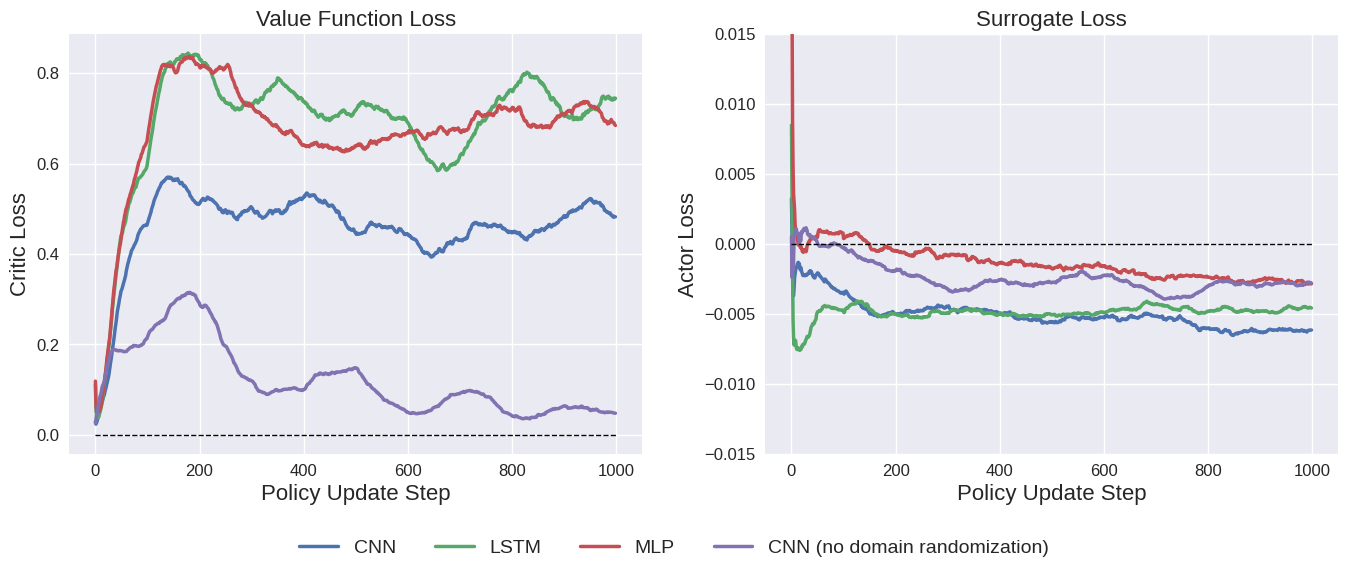

In [9]:

plt.style.use('seaborn-v0_8')
plt.rcParams.update({
    'font.size': 24,
    'axes.titlesize': 16,     # Font size for titles
    'axes.labelsize': 16,     # Font size for x and y labels
    'xtick.labelsize': 12,    # Font size for x tick labels
    'ytick.labelsize': 12,    # Font size for y tick labels
    'legend.fontsize': 12     # Font size for legend
})


def custom_rolling_mean_std(data, max_window_size):
    rolling_means = []
    rolling_stds = []
    for i in range(1, len(data) + 1):
        window_size = min(i, max_window_size)
        window_data = data[i-window_size:i]
        rolling_means.append(window_data.mean())
        rolling_stds.append(window_data.std())
    return np.array(rolling_means), np.array(rolling_stds)

def plot_combined_graphs(data_files1, data_files2, labels, title1, ylabel1, title2, ylabel2, output_filename, ylim1=None, ylim2=None):
    max_window_size = 100
    dfs1, dfs2 = [], []
    rolling_means_list1, rolling_means_list2 = [], []
    rolling_stds_list1, rolling_stds_list2 = [], []

    # Load and process each CSV file for the first set of data files
    for data_file in data_files1:
        df = pd.read_csv(data_file)
        df = df.sort_values(by='Step')
        df = df[df['Step'] >= 0]
        rolling_mean, rolling_std = custom_rolling_mean_std(df['Value'], max_window_size)
        dfs1.append(df)
        rolling_means_list1.append(rolling_mean)
        rolling_stds_list1.append(rolling_std)

    # Load and process each CSV file for the second set of data files
    for data_file in data_files2:
        df = pd.read_csv(data_file)
        df = df.sort_values(by='Step')
        df = df[df['Step'] >= 0]
        rolling_mean, rolling_std = custom_rolling_mean_std(df['Value'], max_window_size)
        dfs2.append(df)
        rolling_means_list2.append(rolling_mean)
        rolling_stds_list2.append(rolling_std)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plotting the rolling mean for the first set of data files
    for data_file, label, df, rolling_mean, rolling_std in zip(data_files1, labels, dfs1, rolling_means_list1, rolling_stds_list1):
        steps = df['Step'].values
        color = next(ax1._get_lines.prop_cycler)['color']
        ax1.plot(steps, rolling_mean, label=label, color=color, linewidth=2.5)
        # Optionally, uncomment these lines to plot the standard deviation areas
        # ax1.fill_between(steps, rolling_mean - rolling_std, rolling_mean + rolling_std, color=color, alpha=0.2)
        # ax1.plot(steps, rolling_mean - rolling_std, color=color, linewidth=0.5)
        # ax1.plot(steps, rolling_mean + rolling_std, color=color, linewidth=0.5)

    ax1.plot([0, len(steps)], [0, 0], color='black', linestyle='--', linewidth=1)
    ax1.set_xlabel('Policy Update Step')
    ax1.set_ylabel(ylabel1)
    ax1.set_title(title1)
    if ylim1:
        ax1.set_ylim(ylim1)

    # Plotting the rolling mean for the second set of data files
    for data_file, label, df, rolling_mean, rolling_std in zip(data_files2, labels, dfs2, rolling_means_list2, rolling_stds_list2):
        steps = df['Step'].values
        color = next(ax2._get_lines.prop_cycler)['color']
        ax2.plot(steps, rolling_mean, label=label, color=color, linewidth=2.5)
        # Optionally, uncomment these lines to plot the standard deviation areas
        # ax2.fill_between(steps, rolling_mean - rolling_std, rolling_mean + rolling_std, color=color, alpha=0.2)
        # ax2.plot(steps, rolling_mean - rolling_std, color=color, linewidth=0.5)
        # ax2.plot(steps, rolling_mean + rolling_std, color=color, linewidth=0.5)

    ax2.plot([0, len(steps)], [0, 0], color='black', linestyle='--', linewidth=1)
    ax2.set_xlabel('Policy Update Step')
    ax2.set_ylabel(ylabel2)
    ax2.set_title(title2)
    if ylim2:
        ax2.set_ylim(ylim2)

    # Combine legends from both subplots and place below the plots
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=4, fontsize=14)

    # Adjust layout to make space for the combined legend
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    # Save the plot as SVG
    plt.savefig(output_filename, format='svg')
    plt.show()

# Example usage
value_function_files = [
    'training_data/value_function/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/value_function/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/value_function/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/value_function/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv'
]
surrogate_files = [
    'training_data/surrogate/2024-05-16_14-38-55_cnn-1000.csv', 
    'training_data/surrogate/2024-05-16_17-58-21_lstm-1000.csv',
    'training_data/surrogate/2024-05-16_19-22-56_mlp-1000.csv',
    'training_data/surrogate/2024-05-16_16-17-43_cnn-1000_no-domain-randomization.csv'
]
labels = ['CNN', 'LSTM', 'MLP', 'CNN (no domain randomization)']
output_filename = 'images/losses.svg'

plot_combined_graphs(value_function_files, surrogate_files, labels, 'Value Function Loss', 'Critic Loss', 'Surrogate Loss', 'Actor Loss', output_filename, ylim2=(-0.015, 0.015))

